In [1]:
import numpy as np
import pandas as pd

feature_o=pd.read_csv('./tmp/cafe_features_400m.csv')
feature_o['zone']=feature_o['addr'].copy()
feature_o['zone']=feature_o['zone'].str.split('區',expand=True).drop([1,2], axis=1)
feature = feature_o.loc[:,'density_2021':'train'].fillna(0)
feature

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
0,30537.582094,-1.038945,3844691,3,1.0,3.0,2.0,3.0,0.0,68.0,1.0,11.0,14.0,1.0,24.0,0.0
1,34199.348503,-1.879027,1857272,6,2.0,3.0,1.0,2.0,1.0,91.0,1.0,14.0,23.0,0.0,20.0,0.0
2,16690.778379,-0.500099,2769267,3,2.0,3.0,0.0,2.0,0.0,0.0,1.0,12.0,12.0,1.0,20.0,0.0
3,30029.689819,-0.402234,2750941,6,5.0,4.0,2.0,0.0,2.0,38.0,2.0,18.0,11.0,0.0,43.0,0.0
4,37267.488548,-1.043902,1839588,4,1.0,3.0,2.0,4.0,1.0,50.0,0.0,20.0,20.0,0.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,33846.823431,-0.448332,904809,1,3.0,8.0,1.0,5.0,0.0,139.0,3.0,16.0,2.0,0.0,1.0,0.0
669,15354.918545,-0.271195,2131815,1,4.0,2.0,0.0,2.0,0.0,45.0,2.0,9.0,1.0,0.0,0.0,0.0
670,4921.167930,-2.656622,77812,2,3.0,2.0,0.0,1.0,0.0,68.0,2.0,3.0,1.0,0.0,1.0,0.0
671,6298.055230,7.973902,991876,1,0.0,1.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0


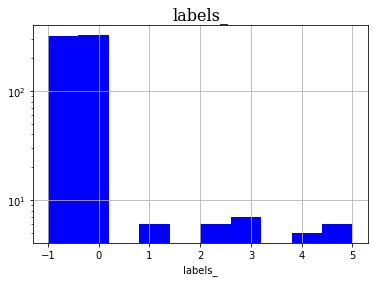

{-1, 0, 1, 2, 3, 4, 5}

In [72]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np

scaler = MinMaxScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=1, metric='l1', min_samples=6).fit(X)

# 存模型
clf = pickle.dumps(clustering)

dump(clf, 'MinMaxnearby400m.joblib') 

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()

set(clustering.labels_)

In [3]:
feature_o['labels'] = list(clustering.labels_)

In [4]:
feature_o[feature_o['labels'] == 0]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
0,cama,台北市敦化南路二段5號,25.032824,121.549153,30537.582094,-1.038945,3844691,3,1.0,3.0,...,0.0,68.0,1.0,11.0,14.0,1.0,24.0,0.0,台北市敦化南路二段5號,0
1,cama,台北市中山區民生東路二段133號,25.058088,121.532388,34199.348503,-1.879027,1857272,6,2.0,3.0,...,1.0,91.0,1.0,14.0,23.0,0.0,20.0,0.0,台北市中山,0
2,cama,台北市中山區長安東路二段94號,25.048324,121.534597,16690.778379,-0.500099,2769267,3,2.0,3.0,...,0.0,0.0,1.0,12.0,12.0,1.0,20.0,0.0,台北市中山,0
4,cama,台北市中山區民權東路二段97號,25.062712,121.532380,37267.488548,-1.043902,1839588,4,1.0,3.0,...,1.0,50.0,0.0,20.0,20.0,0.0,8.0,0.0,台北市中山,0
12,cama,台北市中正區廣州街10號,25.035506,121.508167,8880.961197,-0.698779,1801442,4,2.0,1.0,...,1.0,62.0,0.0,5.0,6.0,0.0,2.0,0.0,台北市中正,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,85 cafe,新北市萬里區港東路65-1號,25.204034,121.687852,620.705292,-1.277785,460753,1,0.0,1.0,...,0.0,44.0,0.0,3.0,1.0,0.0,0.0,0.0,新北市萬里,0
667,85 cafe,新北市蘆洲區長安街225號1樓,25.082557,121.459412,60483.650968,-0.514861,975373,2,2.0,3.0,...,0.0,88.0,9.0,11.0,4.0,0.0,4.0,0.0,新北市蘆洲,0
669,85 cafe,新北市蘆洲區民族路321號,25.091487,121.474329,15354.918545,-0.271195,2131815,1,4.0,2.0,...,0.0,45.0,2.0,9.0,1.0,0.0,0.0,0.0,新北市蘆洲,0
670,85 cafe,新北市金山區中山路106號,25.219346,121.639930,4921.167930,-2.656622,77812,2,3.0,2.0,...,0.0,68.0,2.0,3.0,1.0,0.0,1.0,0.0,新北市金山,0


In [5]:
df_0 = feature_o[feature_o['labels'] == 0].loc[:,'density_2021':'train']

df_0.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,324.000000,324.000000,3.240000e+02,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.0
mean,29617.268764,-0.408454,2.208130e+06,2.783951,2.194444,2.354938,1.148148,1.981481,0.296296,65.546296,1.925926,9.095679,4.950617,0.209877,6.012346,0.0
std,20901.772559,1.931003,1.186574e+06,1.491853,1.915191,1.810002,0.990495,1.639196,0.457330,61.395341,1.842248,3.827566,5.613233,0.415372,5.852668,0.0
min,620.705292,-4.033235,7.781200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,10832.759547,-1.353546,1.323412e+06,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,7.000000,1.000000,6.000000,1.000000,0.000000,2.000000,0.0
50%,27574.135852,-0.830126,1.951855e+06,3.000000,2.000000,2.000000,1.000000,2.000000,0.000000,56.500000,2.000000,9.000000,3.000000,0.000000,4.000000,0.0
75%,42624.348219,-0.143410,2.755089e+06,4.000000,3.000000,4.000000,2.000000,3.000000,1.000000,106.250000,3.000000,11.000000,7.000000,0.000000,9.000000,0.0
max,110994.346742,9.949524,7.588398e+06,7.000000,9.000000,8.000000,4.000000,7.000000,1.000000,309.000000,10.000000,23.000000,35.000000,2.000000,30.000000,0.0


In [6]:
df_0.median()

density_2021      2.757414e+04
ave_pop_growth   -8.301256e-01
2019_income       1.951855e+06
chain_cafe        3.000000e+00
breakfast         2.000000e+00
beverage          2.000000e+00
fastfood          1.000000e+00
supermarket       2.000000e+00
MRT               0.000000e+00
bus_stop          5.650000e+01
parking_space     2.000000e+00
CVS               9.000000e+00
cafe              3.000000e+00
school            0.000000e+00
bank              4.000000e+00
train             0.000000e+00
dtype: float64

In [ ]:
df_0.hist(figsize=(18, 10));

# 大部分人口密度(27574.14)
# 人口大多緩步負成長(-0.8301256)
# 年收均值(1951855)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(2)
# 飲料店(2)
# 速食餐廳(1)
# 超市(2)
# 捷運(0)
# 停車場(2)
# CVS(9)
# cafe(3)
# school(0)
# 銀行(4)
# 火車站(0)
# 巴士站至少(56.5)站

In [7]:
feature_o[feature_o['labels'] == -1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
3,cama,台北市中山區長春路133-5號,25.054950,121.531175,30029.689819,-0.402234,2750941,6,5.0,4.0,...,2.0,38.0,2.0,18.0,11.0,0.0,43.0,0.0,台北市中山,-1
5,cama,台北市中山區南京東路三段82號,25.051750,121.539348,21085.129310,0.000600,3990206,4,1.0,0.0,...,0.0,20.0,3.0,14.0,15.0,0.0,28.0,0.0,台北市中山,-1
6,cama,台北市中山區民生東路一段2號,25.057835,121.523249,40836.413198,-0.122100,2793229,5,3.0,6.0,...,1.0,34.0,4.0,33.0,21.0,0.0,23.0,0.0,台北市中山,-1
7,cama,台北市中山區長安東路一段19號,25.049633,121.522983,24953.495137,-0.808010,1859218,3,1.0,4.0,...,0.0,2.0,5.0,18.0,31.0,0.0,13.0,0.0,台北市中山,-1
8,cama,台北市中山區民權西路73號,25.063037,121.519885,20744.096374,-0.599016,2900878,5,1.0,4.0,...,2.0,80.0,1.0,14.0,14.0,2.0,16.0,0.0,台北市中山,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,85 cafe,新北市淡水區中山北路一段149巷15號,25.177600,121.442849,31200.839681,-1.180762,883952,1,3.0,2.0,...,0.0,364.0,2.0,9.0,3.0,0.0,3.0,0.0,新北市淡水,-1
664,85 cafe,新北市瑞芳區明燈路三段35號,25.107800,121.807171,21939.680212,-1.170827,494705,2,1.0,3.0,...,0.0,148.0,7.0,6.0,0.0,0.0,2.0,1.0,新北市瑞芳,-1
666,85 cafe,新北市蘆洲區復興路21號,25.087335,121.475661,52188.165157,-0.686037,761042,1,5.0,3.0,...,1.0,166.0,6.0,10.0,2.0,1.0,4.0,0.0,新北市蘆洲,-1
668,85 cafe,新北市蘆洲區光華路174號,25.082182,121.465159,33846.823431,-0.448332,904809,1,3.0,8.0,...,0.0,139.0,3.0,16.0,2.0,0.0,1.0,0.0,新北市蘆洲,-1


In [8]:
df_i1 = feature_o[feature_o['labels'] == -1].loc[:,'density_2021':'train']
df_i1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,319.000000,319.000000,3.190000e+02,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,29129.695924,-0.196742,2.721240e+06,4.476489,3.376176,3.815047,2.188088,1.648903,0.755486,112.081505,2.667712,13.090909,10.003135,0.442006,13.329154,0.128527
std,18146.091217,2.524549,2.104141e+06,2.437633,2.973076,2.537819,1.981609,1.572841,0.706946,105.842203,2.593398,6.521943,9.422807,0.616026,11.925930,0.335201
min,1318.101678,-12.785775,8.480800e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,14310.600024,-1.373311,1.258028e+06,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,21.000000,1.000000,8.000000,3.000000,0.000000,4.000000,0.000000
50%,26509.879191,-0.654472,2.169240e+06,4.000000,3.000000,4.000000,2.000000,1.000000,1.000000,74.000000,2.000000,12.000000,7.000000,0.000000,10.000000,0.000000
75%,41692.780354,0.246542,3.539135e+06,6.000000,5.500000,5.000000,3.000000,3.000000,1.000000,185.000000,4.000000,17.000000,16.000000,1.000000,17.000000,0.000000
max,78098.970675,12.415476,1.057882e+07,14.000000,14.000000,11.000000,13.000000,6.000000,3.000000,462.000000,12.000000,40.000000,56.000000,3.000000,58.000000,1.000000


In [9]:
df_i1.median()

density_2021      2.650988e+04
ave_pop_growth   -6.544723e-01
2019_income       2.169240e+06
chain_cafe        4.000000e+00
breakfast         3.000000e+00
beverage          4.000000e+00
fastfood          2.000000e+00
supermarket       1.000000e+00
MRT               1.000000e+00
bus_stop          7.400000e+01
parking_space     2.000000e+00
CVS               1.200000e+01
cafe              7.000000e+00
school            0.000000e+00
bank              1.000000e+01
train             0.000000e+00
dtype: float64

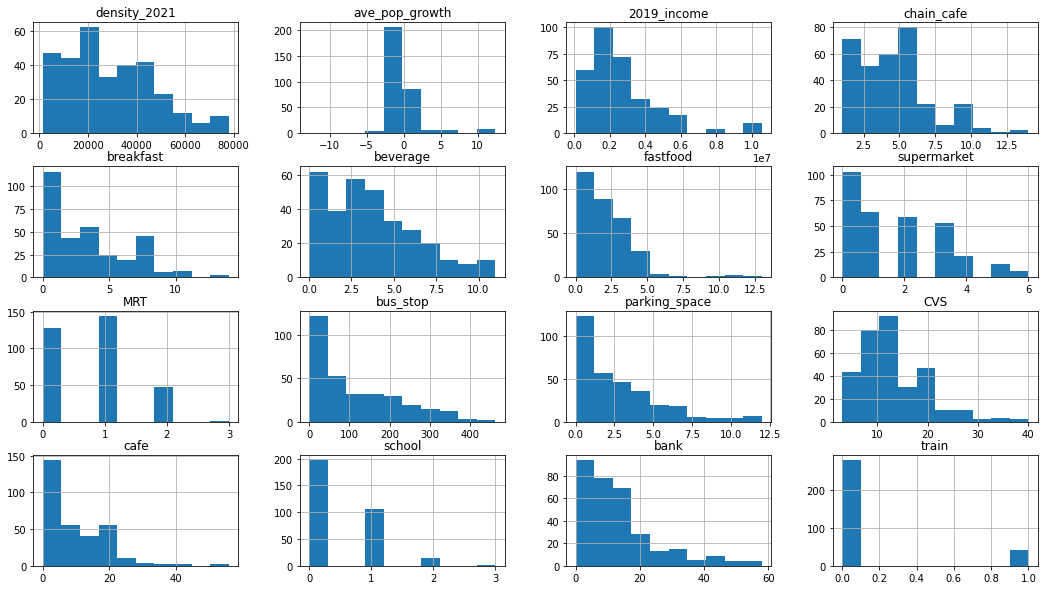

In [10]:
df_i1.hist(figsize=(18, 10));

# 大部分人口密度(26509.88)
# 人口大多緩步負成長(-0.6544723)
# 年收均值(2169240)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(2)
# 飲料店(1)
# 速食餐廳(1)
# 超市(1)
# 捷運(0)
# 停車場(1)
# CVS(7)
# cafe(5)
# school(0)
# 銀行(6)
# 火車站(0)
# 巴士站至少(74)站

In [11]:
df_1 = feature_o[feature_o['labels'] == 1].loc[:,'density_2021':'train']

In [12]:
feature_o[feature_o['labels'] == 1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
16,cama,台北市中正區南昌路一段39號,25.031563,121.517084,26014.129659,-4.059160,2650936,4,3.0,5.0,...,2.0,47.0,0.0,7.0,15.0,0.0,15.0,0.0,台北市中正,1
85,louisa,台北市臨沂街27巷9-4號,25.041235,121.531428,26122.241810,-2.378910,2834326,4,1.0,5.0,...,2.0,6.0,4.0,11.0,17.0,0.0,18.0,0.0,台北市臨沂街27巷9-4號,1
120,louisa,台北市中正區南海路24號,25.032416,121.516716,26014.129659,-4.059160,2650936,4,3.0,5.0,...,2.0,45.0,0.0,6.0,13.0,0.0,15.0,0.0,台北市中正,1
358,stbks,台北市中山區松江路54號1樓,25.048680,121.532752,21968.747781,0.031484,2835061,4,2.0,5.0,...,2.0,5.0,1.0,12.0,17.0,0.0,22.0,0.0,台北市中山,1
369,stbks,台北市中正區忠孝東路二段134巷2號,25.041964,121.531706,26122.241810,-2.378910,2834326,4,1.0,6.0,...,2.0,4.0,3.0,11.0,23.0,0.0,14.0,0.0,台北市中正,1
381,stbks,台北市中正區南海路20號,25.032492,121.517011,26014.129659,-4.059160,2650936,4,3.0,5.0,...,2.0,42.0,0.0,6.0,13.0,0.0,15.0,0.0,台北市中正,1


In [13]:
df_1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,6.000000,6.000000,6.000000e+00,6.0,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.0
mean,25375.936730,-2.817302,2.742754e+06,4.0,2.166667,5.166667,2.166667,1.833333,2.0,24.833333,1.333333,8.833333,16.333333,0.0,16.500000,0.0
std,1670.014953,1.620283,1.005814e+05,0.0,0.983192,0.408248,0.408248,0.408248,0.0,21.793730,1.751190,2.786874,3.723797,0.0,3.016621,0.0
min,21968.747781,-4.059160,2.650936e+06,4.0,1.000000,5.000000,2.000000,1.000000,2.0,4.000000,0.000000,6.000000,13.000000,0.0,14.000000,0.0
25%,26014.129659,-4.059160,2.650936e+06,4.0,1.250000,5.000000,2.000000,2.000000,2.0,5.250000,0.000000,6.250000,13.500000,0.0,15.000000,0.0
50%,26014.129659,-3.219035,2.742631e+06,4.0,2.500000,5.000000,2.000000,2.000000,2.0,24.000000,0.500000,9.000000,16.000000,0.0,15.000000,0.0
75%,26095.213772,-2.378910,2.834326e+06,4.0,3.000000,5.000000,2.000000,2.000000,2.0,44.250000,2.500000,11.000000,17.000000,0.0,17.250000,0.0
max,26122.241810,0.031484,2.835061e+06,4.0,3.000000,6.000000,3.000000,2.000000,2.0,47.000000,4.000000,12.000000,23.000000,0.0,22.000000,0.0


In [14]:
df_1.median()

density_2021      2.601413e+04
ave_pop_growth   -3.219035e+00
2019_income       2.742631e+06
chain_cafe        4.000000e+00
breakfast         2.500000e+00
beverage          5.000000e+00
fastfood          2.000000e+00
supermarket       2.000000e+00
MRT               2.000000e+00
bus_stop          2.400000e+01
parking_space     5.000000e-01
CVS               9.000000e+00
cafe              1.600000e+01
school            0.000000e+00
bank              1.500000e+01
train             0.000000e+00
dtype: float64

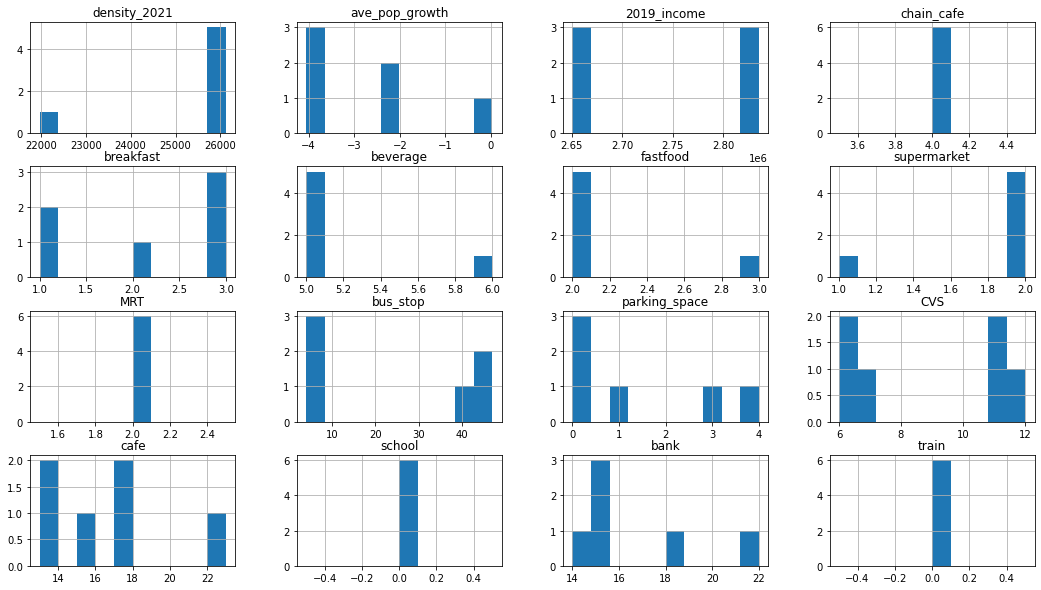

In [15]:
df_1.hist(figsize=(18, 10));

# 大部分人口密度(26014.13)
# 人口大多緩步負成長(-3.219035)
# 年收均值(2742631)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(2.5)
# 飲料店(5)
# 速食餐廳(2)
# 超市(2)
# 捷運(2)
# 停車場(0.5)
# CVS(9)
# cafe(16)
# school(0)
# 銀行(15)
# 火車站(0)
# 巴士站至少(24)站

In [16]:
df_2 = feature_o[feature_o['labels'] == 2].loc[:,'density_2021':'train']

In [17]:
df_2.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,6.000000,6.000000,6.00000,6.0,6.000000,6.000000,6.0,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,34793.786500,-0.365961,764747.00000,6.0,6.333333,7.500000,3.0,2.166667,0.0,75.833333,0.333333,11.166667,1.166667,1.500000,12.333333,0.0
std,4541.510178,0.176072,71979.89948,0.0,0.516398,0.547723,0.0,0.408248,0.0,6.705719,0.816497,1.602082,0.408248,0.547723,1.751190,0.0
min,30986.774138,-0.681774,659280.00000,6.0,6.000000,7.000000,3.0,2.000000,0.0,66.000000,0.000000,10.000000,1.000000,1.000000,11.000000,0.0
25%,30986.774138,-0.368677,759779.00000,6.0,6.000000,7.000000,3.0,2.000000,0.0,72.750000,0.000000,10.000000,1.000000,1.000000,11.000000,0.0
50%,33473.827106,-0.368677,759779.00000,6.0,6.000000,7.500000,3.0,2.000000,0.0,76.500000,0.000000,10.500000,1.000000,1.500000,11.500000,0.0
75%,37663.226812,-0.273072,762827.75000,6.0,6.750000,8.000000,3.0,2.000000,0.0,78.000000,0.000000,11.750000,1.000000,2.000000,13.500000,0.0
max,41610.840789,-0.166757,886021.00000,6.0,7.000000,8.000000,3.0,3.000000,0.0,86.000000,2.000000,14.000000,2.000000,2.000000,15.000000,0.0


In [18]:
df_2.median()

density_2021       33473.827106
ave_pop_growth        -0.368677
2019_income       759779.000000
chain_cafe             6.000000
breakfast              6.000000
beverage               7.500000
fastfood               3.000000
supermarket            2.000000
MRT                    0.000000
bus_stop              76.500000
parking_space          0.000000
CVS                   10.500000
cafe                   1.000000
school                 1.500000
bank                  11.500000
train                  0.000000
dtype: float64

In [20]:
feature_o[feature_o['labels'] == 2]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
63,cama,新北市板橋區三民路二段67號,25.017021,121.479450,30986.774138,-0.368677,759779,6,6.0,8.0,...,0.0,78.0,0.0,10.0,1.0,2.0,11.0,0.0,新北市板橋,2
64,cama,新北市板橋區三民路二段67號1樓,25.017021,121.479450,30986.774138,-0.368677,759779,6,6.0,8.0,...,0.0,78.0,0.0,10.0,1.0,2.0,11.0,0.0,新北市板橋,2
302,louisa,新北市板橋區中山路二段167號,25.016862,121.475889,35960.880073,-0.681774,763844,6,7.0,7.0,...,0.0,86.0,2.0,12.0,2.0,1.0,15.0,0.0,新北市板橋,2
303,louisa,新北市板橋區三民路二段101號,25.016175,121.479378,30986.774138,-0.368677,759779,6,6.0,7.0,...,0.0,75.0,0.0,14.0,1.0,1.0,12.0,0.0,新北市板橋,2
522,stbks,新北市板橋區三民路二段23號(板橋三民路上家樂福旁),25.018278,121.479510,38230.675725,-0.241204,886021,6,7.0,7.0,...,0.0,66.0,0.0,11.0,1.0,2.0,11.0,0.0,新北市板橋,2
648,85 cafe,新北市板橋區三民路二段66號,25.017337,121.479084,41610.840789,-0.166757,659280,6,6.0,8.0,...,0.0,72.0,0.0,10.0,1.0,1.0,14.0,0.0,新北市板橋,2


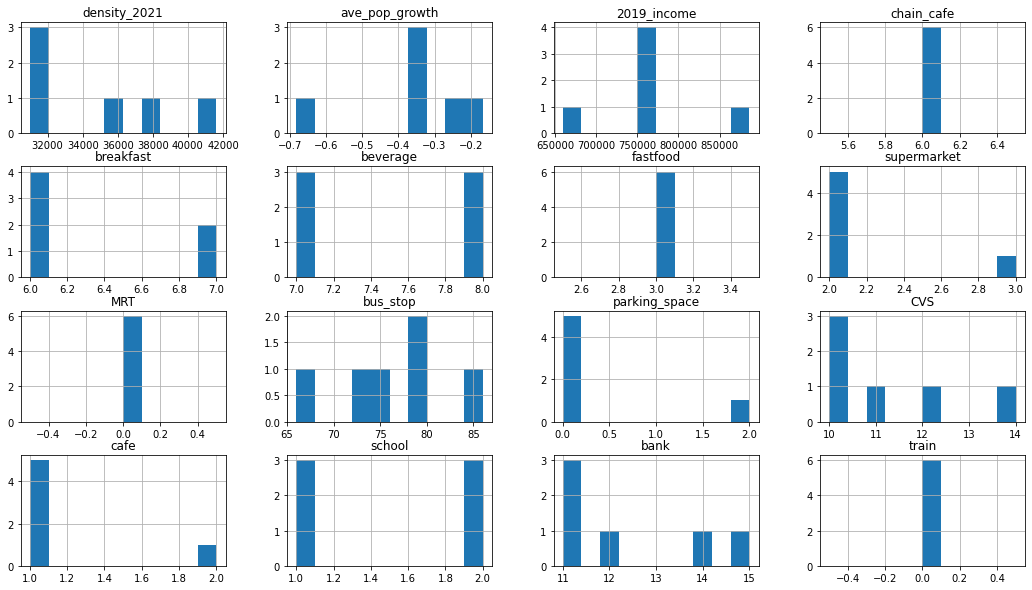

In [19]:
df_2.hist(figsize=(18, 10));

# 大部分人口密度(33473.827106)
# 人口大多緩步負成長(-0.368677)
# 年收均值(759779)
# 平均有(6)間小型咖啡廳
# 沒有早餐店(6)
# 飲料店(7.5)
# 速食餐廳(3)
# 超市(2)
# 捷運(0)
# 停車場(0)
# CVS(10.5)
# cafe(1)
# school(1.5)
# 銀行(11.5)
# 火車站(0)
# 巴士站至少(76.5)站

In [21]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
117,louisa,台北市中正區信陽街5號之2,25.044699,121.516700,5734.296784,0.58577,1631191,13,1.0,7.0,...,3.0,102.0,1.0,33.0,10.0,0.0,30.0,1.0,台北市中正,3
121,louisa,台北市中正區忠孝西路一段38號B1-B櫃,25.046215,121.516436,5734.296784,0.58577,1631191,14,1.0,7.0,...,2.0,90.0,2.0,34.0,10.0,0.0,33.0,1.0,台北市中正,3
125,louisa,台北市中正區忠孝西路一段50號1樓,25.046303,121.515823,5734.296784,0.58577,1631191,15,1.0,7.0,...,2.0,92.0,1.0,38.0,11.0,0.0,35.0,1.0,台北市中正,3
371,stbks,台北市中正區忠孝西路一段49號B1,25.047066,121.517670,5734.296784,0.58577,1631191,14,0.0,8.0,...,2.0,56.0,3.0,32.0,12.0,0.0,12.0,1.0,台北市中正,3
373,stbks,台北市中正區南陽街1號2F,25.045715,121.516229,5734.296784,0.58577,1631191,15,1.0,7.0,...,2.0,102.0,1.0,36.0,8.0,0.0,35.0,1.0,台北市中正,3
380,stbks,台北市中正區北平西路3號2樓,25.047176,121.517058,5734.296784,0.58577,1631191,15,0.0,9.0,...,2.0,60.0,3.0,34.0,14.0,0.0,15.0,1.0,台北市中正,3
384,stbks,台北市中正區忠孝西路一段47號B1,25.046880,121.516761,5734.296784,0.58577,1631191,14,1.0,8.0,...,2.0,60.0,2.0,34.0,12.0,0.0,25.0,1.0,台北市中正,3


In [22]:
df_3 = feature_o[feature_o['labels'] == 3].loc[:,'density_2021':'train']

In [23]:
df_3.median()

density_2021      5.734297e+03
ave_pop_growth    5.857702e-01
2019_income       1.631191e+06
chain_cafe        1.400000e+01
breakfast         1.000000e+00
beverage          7.000000e+00
fastfood          1.500000e+01
supermarket       0.000000e+00
MRT               2.000000e+00
bus_stop          9.000000e+01
parking_space     2.000000e+00
CVS               3.400000e+01
cafe              1.100000e+01
school            0.000000e+00
bank              3.000000e+01
train             1.000000e+00
dtype: float64

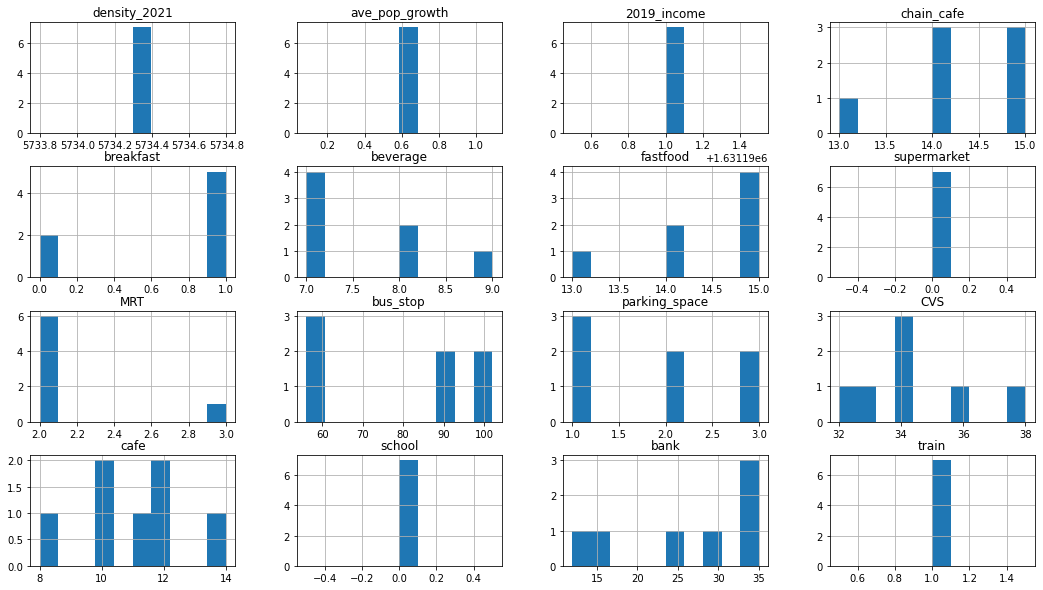

In [24]:
df_3.hist(figsize=(18, 10));

# 大部分人口密度(5734.297)
# 人口大多緩步負成長(0.5857702)
# 年收均值(1631191)
# 平均有(14)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(7)
# 速食餐廳(15)
# 超市(0)
# 捷運(2)
# 停車場(2)
# CVS(34)
# cafe(11)
# school(0)
# 銀行(30)
# 火車站(1)
# 巴士站至少(90)站

In [25]:
feature_o[feature_o['labels'] == 4]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
17,cama,台北市信義區莊敬路246號,25.029312,121.562296,24066.682946,-0.837977,3119196,5,3.0,7.0,...,0.0,0.0,3.0,13.0,14.0,1.0,3.0,0.0,台北市信義,4
132,louisa,台北市信義區莊敬路325巷36號,25.028537,121.564336,30014.710876,-1.335978,4064796,5,4.0,7.0,...,0.0,0.0,5.0,12.0,12.0,1.0,3.0,0.0,台北市信義,4
393,stbks,台北市信義區吳興街252號1樓(台北醫學院第三醫療大樓一樓),25.026637,121.563638,27264.627040,-1.615284,2721242,5,4.0,7.0,...,0.0,0.0,4.0,12.0,11.0,1.0,2.0,0.0,台北市信義,4
401,stbks,台北市信義區吳興街220巷1號,25.027667,121.562904,21929.177813,-2.450219,1330649,5,5.0,7.0,...,0.0,0.0,5.0,13.0,12.0,1.0,3.0,0.0,台北市信義,4
579,85 cafe,台北市信義區莊敬路416號,25.027144,121.566246,30014.710876,-1.335978,4064796,5,8.0,8.0,...,0.0,0.0,3.0,13.0,11.0,1.0,2.0,0.0,台北市信義,4


In [26]:
df_4 = feature_o[feature_o['labels'] == 4].loc[:,'density_2021':'train']

In [27]:
df_4.median()

density_2021      2.726463e+04
ave_pop_growth   -1.335978e+00
2019_income       3.119196e+06
chain_cafe        5.000000e+00
breakfast         4.000000e+00
beverage          7.000000e+00
fastfood          2.000000e+00
supermarket       2.000000e+00
MRT               0.000000e+00
bus_stop          0.000000e+00
parking_space     4.000000e+00
CVS               1.300000e+01
cafe              1.200000e+01
school            1.000000e+00
bank              3.000000e+00
train             0.000000e+00
dtype: float64

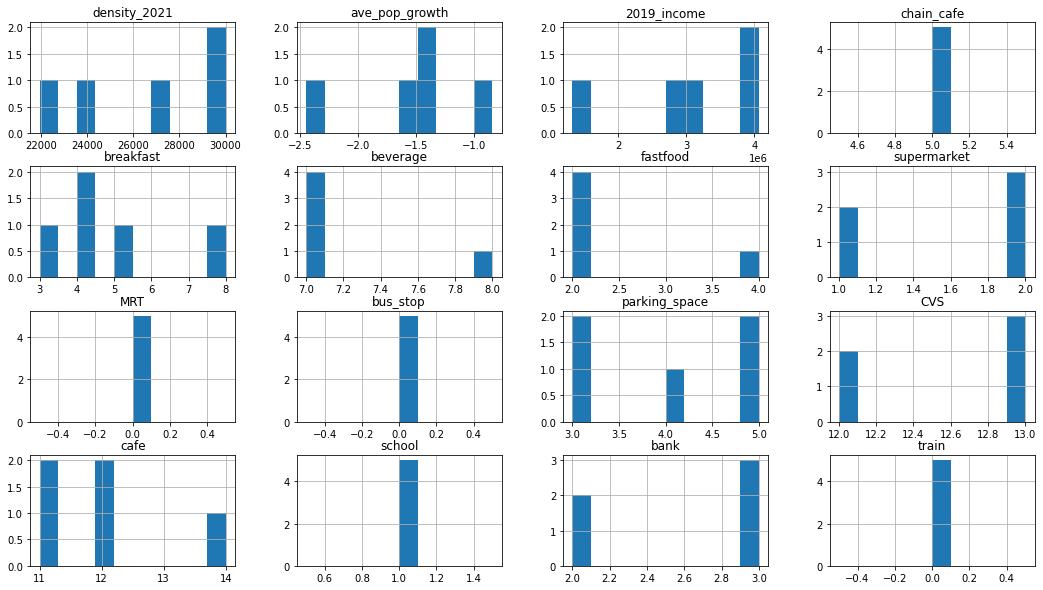

In [28]:
df_4.hist(figsize=(18, 10));

# 大部分人口密度(27264.63)
# 人口大多緩步負成長(-1.335978)
# 年收均值(3119196)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(4)
# 飲料店(7)
# 速食餐廳(2)
# 超市(2)
# 捷運(0)
# 停車場(4)
# CVS(13)
# cafe(12)
# school(1)
# 銀行(3)
# 火車站(0)
# 巴士站至少(0)站

In [29]:
df_5 = feature_o[feature_o['labels'] == 5].loc[:,'density_2021':'train']
df_5.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,6.000000,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,36726.783054,-0.116212,2.924680e+06,4.666667,0.166667,3.833333,1.166667,1.666667,2.0,14.833333,0.666667,11.666667,14.166667,1.166667,15.666667,0.0
std,11100.798300,1.612243,9.620807e+05,0.516398,0.408248,2.041241,0.752773,1.032796,0.0,5.706721,1.632993,2.581989,2.639444,0.408248,2.338090,0.0
min,26122.241810,-2.378910,1.389956e+06,4.000000,0.000000,0.000000,0.000000,1.000000,2.0,8.000000,0.000000,9.000000,11.000000,1.000000,13.000000,0.0
25%,32933.952197,-1.300023,2.393197e+06,4.250000,0.000000,3.500000,1.000000,1.000000,2.0,11.250000,0.000000,10.000000,12.250000,1.000000,14.250000,0.0
50%,34230.503248,0.435110,3.186846e+06,5.000000,0.000000,5.000000,1.000000,1.000000,2.0,13.500000,0.000000,11.000000,14.000000,1.000000,15.000000,0.0
75%,34710.978849,0.829532,3.711695e+06,5.000000,0.000000,5.000000,1.750000,2.500000,2.0,18.750000,0.000000,12.750000,15.750000,1.000000,17.250000,0.0
max,58404.544125,1.728813,3.769138e+06,5.000000,1.000000,5.000000,2.000000,3.000000,2.0,23.000000,4.000000,16.000000,18.000000,2.000000,19.000000,0.0


In [30]:
feature_o[feature_o['labels'] == 5]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
11,cama,台北市中正區新生南路一段90號,25.040386,121.532560,26122.241810,-2.378910,2834326,5,1.0,5.0,...,2.0,8.0,4.0,10.0,11.0,1.0,18.0,0.0,台北市中正,5
44,cama,台北市大安區羅斯福路二段81號之2,25.025773,121.523644,34230.503248,0.829532,3769138,5,0.0,5.0,...,2.0,15.0,0.0,16.0,18.0,2.0,19.0,0.0,台北市大安,5
45,cama,台北市大安區信義路二段52號,25.034479,121.525865,32501.768513,1.728813,2246154,4,0.0,0.0,...,2.0,11.0,0.0,9.0,12.0,1.0,14.0,0.0,台北市大安,5
77,louisa,台北市南昌路二段115號,25.026423,121.521719,34871.137382,-1.746928,1389956,5,0.0,5.0,...,2.0,20.0,0.0,13.0,16.0,1.0,13.0,0.0,台北市南昌路二段115號,5
181,louisa,台北市大安區和平東路一段79號,25.027054,121.525280,58404.544125,0.040689,3539366,4,0.0,3.0,...,2.0,12.0,0.0,12.0,13.0,1.0,15.0,0.0,台北市大安,5
448,stbks,台北市大安區和平東路一段2號(古亭站四號出口),25.026824,121.522907,34230.503248,0.829532,3769138,5,0.0,5.0,...,2.0,23.0,0.0,10.0,15.0,1.0,15.0,0.0,台北市大安,5


In [31]:
df_5.median()

density_2021      3.423050e+04
ave_pop_growth    4.351105e-01
2019_income       3.186846e+06
chain_cafe        5.000000e+00
breakfast         0.000000e+00
beverage          5.000000e+00
fastfood          1.000000e+00
supermarket       1.000000e+00
MRT               2.000000e+00
bus_stop          1.350000e+01
parking_space     0.000000e+00
CVS               1.100000e+01
cafe              1.400000e+01
school            1.000000e+00
bank              1.500000e+01
train             0.000000e+00
dtype: float64

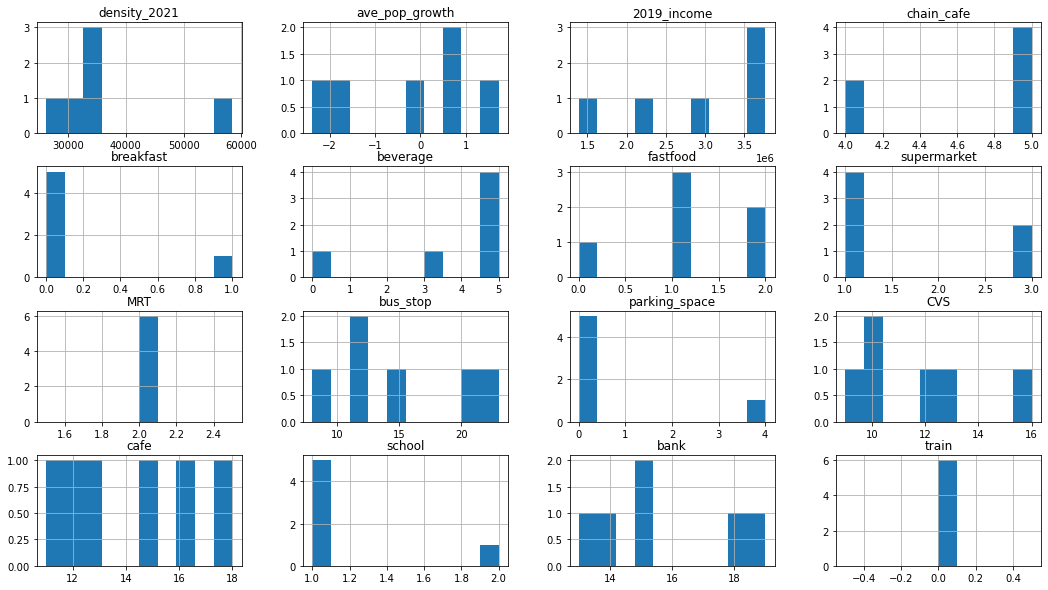

In [32]:
df_5.hist(figsize=(18, 10));

# 大部分人口密度(34230.50)
# 人口大多緩步負成長(0.4351105)
# 年收均值(3186846)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(5)
# 速食餐廳(1)
# 超市(1)
# 捷運(2)
# 停車場(0)
# CVS(11)
# cafe(14)
# school(1)
# 銀行(15)
# 火車站(0)
# 巴士站至少(13.5)站

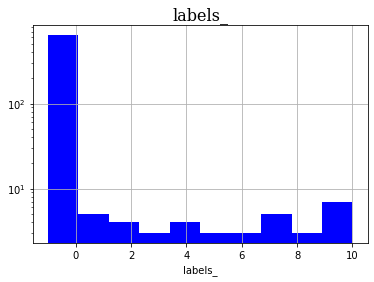

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [53]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import pickle
from joblib import dump, load

scaler = StandardScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=1, metric='l1',algorithm='kd_tree', min_samples=3).fit(X)

# 存模型
# clf = pickle.dumps(clustering)

# dump(clf, 'Zscalenearby300m.joblib') 

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()
feature_o['labels'] = list(clustering.labels_)
set(clustering.labels_)

In [54]:
feature_o[feature_o['labels'] == -1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
0,cama,台北市敦化南路二段5號,25.032824,121.549153,30537.582094,-1.038945,3844691,3,1.0,3.0,...,0.0,68.0,1.0,11.0,14.0,1.0,24.0,0.0,台北市敦化南路二段5號,-1
1,cama,台北市中山區民生東路二段133號,25.058088,121.532388,34199.348503,-1.879027,1857272,6,2.0,3.0,...,1.0,91.0,1.0,14.0,23.0,0.0,20.0,0.0,台北市中山,-1
2,cama,台北市中山區長安東路二段94號,25.048324,121.534597,16690.778379,-0.500099,2769267,3,2.0,3.0,...,0.0,0.0,1.0,12.0,12.0,1.0,20.0,0.0,台北市中山,-1
3,cama,台北市中山區長春路133-5號,25.054950,121.531175,30029.689819,-0.402234,2750941,6,5.0,4.0,...,2.0,38.0,2.0,18.0,11.0,0.0,43.0,0.0,台北市中山,-1
4,cama,台北市中山區民權東路二段97號,25.062712,121.532380,37267.488548,-1.043902,1839588,4,1.0,3.0,...,1.0,50.0,0.0,20.0,20.0,0.0,8.0,0.0,台北市中山,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,85 cafe,新北市蘆洲區光華路174號,25.082182,121.465159,33846.823431,-0.448332,904809,1,3.0,8.0,...,0.0,139.0,3.0,16.0,2.0,0.0,1.0,0.0,新北市蘆洲,-1
669,85 cafe,新北市蘆洲區民族路321號,25.091487,121.474329,15354.918545,-0.271195,2131815,1,4.0,2.0,...,0.0,45.0,2.0,9.0,1.0,0.0,0.0,0.0,新北市蘆洲,-1
670,85 cafe,新北市金山區中山路106號,25.219346,121.639930,4921.167930,-2.656622,77812,2,3.0,2.0,...,0.0,68.0,2.0,3.0,1.0,0.0,1.0,0.0,新北市金山,-1
671,85 cafe,新北市鶯歌區鶯桃路656號,24.969223,121.329193,6298.055230,7.973902,991876,1,0.0,1.0,...,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,新北市鶯歌,-1


In [55]:
dfz_i1=feature_o[feature_o['labels'] == -1].loc[:,'density_2021':'train']
dfz_i1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,633.000000,633.000000,6.330000e+02,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,29992.001170,-0.376069,2.389093e+06,3.688784,2.864139,3.268562,1.837283,1.856240,0.548183,82.962085,2.221169,11.545024,7.641390,0.347551,10.175355,0.055292
std,19377.105598,2.124821,1.613478e+06,2.416220,2.596954,2.364808,2.125136,1.609858,0.680632,84.745217,2.115732,6.105218,7.873967,0.556234,10.245062,0.228731
min,620.705292,-12.785775,7.781200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14427.621534,-1.354158,1.305036e+06,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,11.000000,1.000000,8.000000,2.000000,0.000000,3.000000,0.000000
50%,29265.961638,-0.799581,1.982235e+06,3.000000,2.000000,3.000000,2.000000,2.000000,0.000000,63.000000,2.000000,11.000000,5.000000,0.000000,7.000000,0.000000
75%,41773.262841,-0.006905,2.940345e+06,5.000000,5.000000,5.000000,2.000000,3.000000,1.000000,126.000000,3.000000,14.000000,12.000000,1.000000,14.000000,0.000000
max,110994.346742,12.415476,1.057882e+07,15.000000,14.000000,11.000000,15.000000,7.000000,3.000000,462.000000,12.000000,40.000000,56.000000,3.000000,58.000000,1.000000


In [56]:
dfz_i1.median()

density_2021      2.926596e+04
ave_pop_growth   -7.995811e-01
2019_income       1.982235e+06
chain_cafe        3.000000e+00
breakfast         2.000000e+00
beverage          3.000000e+00
fastfood          2.000000e+00
supermarket       2.000000e+00
MRT               0.000000e+00
bus_stop          6.300000e+01
parking_space     2.000000e+00
CVS               1.100000e+01
cafe              5.000000e+00
school            0.000000e+00
bank              7.000000e+00
train             0.000000e+00
dtype: float64

In [ ]:
dfz_i1.hist(figsize=(18, 10));

# 大部分人口密度(29265.96)
# 人口大多緩步負成長(-0.7995811)
# 年收均值(1982235)
# 平均有(3)間小型咖啡廳
# 早餐店(2)
# 飲料店(3)
# 速食餐廳(2)
# 超市(2)
# 捷運(0)
# 停車場(2)
# CVS(11)
# cafe(5)
# school(0)
# 銀行(7)
# 火車站(0)
# 巴士站至少(63)站

In [57]:
feature_o[feature_o['labels'] == 0]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
16,cama,台北市中正區南昌路一段39號,25.031563,121.517084,26014.129659,-4.05916,2650936,4,3.0,5.0,...,2.0,47.0,0.0,7.0,15.0,0.0,15.0,0.0,台北市中正,0
120,louisa,台北市中正區南海路24號,25.032416,121.516716,26014.129659,-4.05916,2650936,4,3.0,5.0,...,2.0,45.0,0.0,6.0,13.0,0.0,15.0,0.0,台北市中正,0
381,stbks,台北市中正區南海路20號,25.032492,121.517011,26014.129659,-4.05916,2650936,4,3.0,5.0,...,2.0,42.0,0.0,6.0,13.0,0.0,15.0,0.0,台北市中正,0


In [58]:
dfz_0=feature_o[feature_o['labels'] == 0].loc[:,'density_2021':'train']
dfz_0.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000e+00,3.00000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.000000,3.000000,3.0,3.0,3.0
mean,2.601413e+04,-4.05916,2650936.0,4.0,3.0,5.0,2.0,2.0,2.0,44.666667,0.0,6.333333,13.666667,0.0,15.0,0.0
std,4.455596e-12,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.516611,0.0,0.577350,1.154701,0.0,0.0,0.0
min,2.601413e+04,-4.05916,2650936.0,4.0,3.0,5.0,2.0,2.0,2.0,42.000000,0.0,6.000000,13.000000,0.0,15.0,0.0
25%,2.601413e+04,-4.05916,2650936.0,4.0,3.0,5.0,2.0,2.0,2.0,43.500000,0.0,6.000000,13.000000,0.0,15.0,0.0
50%,2.601413e+04,-4.05916,2650936.0,4.0,3.0,5.0,2.0,2.0,2.0,45.000000,0.0,6.000000,13.000000,0.0,15.0,0.0
75%,2.601413e+04,-4.05916,2650936.0,4.0,3.0,5.0,2.0,2.0,2.0,46.000000,0.0,6.500000,14.000000,0.0,15.0,0.0
max,2.601413e+04,-4.05916,2650936.0,4.0,3.0,5.0,2.0,2.0,2.0,47.000000,0.0,7.000000,15.000000,0.0,15.0,0.0


In [59]:
dfz_0.median()

density_2021      2.601413e+04
ave_pop_growth   -4.059160e+00
2019_income       2.650936e+06
chain_cafe        4.000000e+00
breakfast         3.000000e+00
beverage          5.000000e+00
fastfood          2.000000e+00
supermarket       2.000000e+00
MRT               2.000000e+00
bus_stop          4.500000e+01
parking_space     0.000000e+00
CVS               6.000000e+00
cafe              1.300000e+01
school            0.000000e+00
bank              1.500000e+01
train             0.000000e+00
dtype: float64

In [ ]:
dfz_0.hist(figsize=(18, 10));

# 大部分人口密度(26014.13)
# 人口大多緩步負成長(-4.059160)
# 年收均值(2650936)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(3)
# 飲料店(5)
# 速食餐廳(2)
# 超市(2)
# 捷運(2)
# 停車場(1)
# CVS(6)
# cafe(13)
# school(0)
# 銀行(15)
# 火車站(0)
# 巴士站至少(45)站

In [60]:
dfz_1=feature_o[feature_o['labels'] == 1].loc[:,'density_2021':'train']
dfz_1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.0
mean,2156.336462,-2.364998,992878.0,7.0,0.0,2.0,2.0,0.0,1.0,33.400000,0.400000,6.600000,3.0,0.0,2.0,1.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.408319,0.547723,0.547723,0.0,0.0,0.0,0.0
min,2156.336462,-2.364998,992878.0,7.0,0.0,2.0,2.0,0.0,1.0,31.000000,0.000000,6.000000,3.0,0.0,2.0,1.0
25%,2156.336462,-2.364998,992878.0,7.0,0.0,2.0,2.0,0.0,1.0,32.000000,0.000000,6.000000,3.0,0.0,2.0,1.0
50%,2156.336462,-2.364998,992878.0,7.0,0.0,2.0,2.0,0.0,1.0,32.000000,0.000000,7.000000,3.0,0.0,2.0,1.0
75%,2156.336462,-2.364998,992878.0,7.0,0.0,2.0,2.0,0.0,1.0,36.000000,1.000000,7.000000,3.0,0.0,2.0,1.0
max,2156.336462,-2.364998,992878.0,7.0,0.0,2.0,2.0,0.0,1.0,36.000000,1.000000,7.000000,3.0,0.0,2.0,1.0


In [61]:
feature_o[feature_o['labels'] == 1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
35,cama,台北市南港區忠孝東路七段371號B1,25.052571,121.607496,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,32.0,0.0,6.0,3.0,0.0,2.0,1.0,台北市南港,1
162,louisa,台北市南港區忠孝東路七段369號1F,25.052669,121.607208,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,36.0,1.0,7.0,3.0,0.0,2.0,1.0,台北市南港,1
163,louisa,台北市南港區忠孝東路7段369號2樓,25.052669,121.607208,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,36.0,1.0,7.0,3.0,0.0,2.0,1.0,台北市南港,1
421,stbks,台北市南港區忠孝東路七段371號B2,25.052571,121.607496,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,32.0,0.0,6.0,3.0,0.0,2.0,1.0,台北市南港,1
422,stbks,台北市南港區忠孝東路7段359號A棟1樓,25.052512,121.606056,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,31.0,0.0,7.0,3.0,0.0,2.0,1.0,台北市南港,1


In [62]:
dfz_1.median()

density_2021        2156.336462
ave_pop_growth        -2.364998
2019_income       992878.000000
chain_cafe             7.000000
breakfast              0.000000
beverage               2.000000
fastfood               2.000000
supermarket            0.000000
MRT                    1.000000
bus_stop              32.000000
parking_space          0.000000
CVS                    7.000000
cafe                   3.000000
school                 0.000000
bank                   2.000000
train                  1.000000
dtype: float64

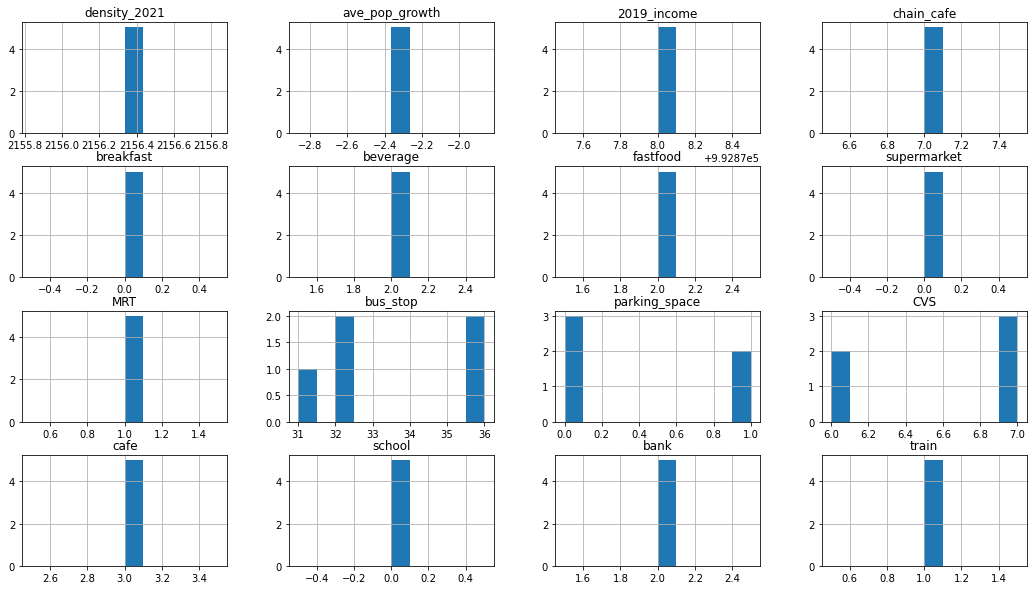

In [63]:
dfz_1.hist(figsize=(18, 10));

# 大部分人口密度(2156.336462)
# 人口大多緩步負成長(-2.364998)
# 年收均值(992878)
# 平均有(7)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(2)
# 超市(0)
# 捷運(1)
# 停車場(0)
# CVS(7)
# cafe(3)
# school(0)
# 銀行(2)
# 火車站(1)
# 巴士站至少(32)站

In [64]:
feature_o[feature_o['labels'] == 2]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
65,cama,新北市板橋區南雅南路二段21號Ｂ1,24.997312,121.452312,15641.543072,1.141744,3539135,4,4.0,6.0,...,1.0,143.0,3.0,5.0,2.0,1.0,3.0,0.0,新北市板橋,2
300,louisa,新北市板橋區南雅南路二段130號,24.996782,121.451925,15641.543072,1.141744,3539135,4,4.0,6.0,...,1.0,161.0,3.0,7.0,2.0,1.0,3.0,0.0,新北市板橋,2
525,stbks,新北市板橋區南雅南路二段21號,24.997312,121.452312,15641.543072,1.141744,3539135,4,4.0,6.0,...,1.0,143.0,3.0,5.0,2.0,1.0,3.0,0.0,新北市板橋,2
526,stbks,新北市板橋區南雅南路二段21號(亞東捷運站3號出口亞東醫院旁),24.997312,121.452312,15641.543072,1.141744,3539135,4,4.0,6.0,...,1.0,143.0,3.0,5.0,2.0,1.0,3.0,0.0,新北市板橋,2


In [65]:
dfz_2=feature_o[feature_o['labels'] == 2].loc[:,'density_2021':'train']
dfz_2.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
mean,15641.543072,1.141744,3539135.0,4.0,4.0,6.0,1.0,0.0,1.0,147.5,3.0,5.5,2.0,1.0,3.0,0.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0
min,15641.543072,1.141744,3539135.0,4.0,4.0,6.0,1.0,0.0,1.0,143.0,3.0,5.0,2.0,1.0,3.0,0.0
25%,15641.543072,1.141744,3539135.0,4.0,4.0,6.0,1.0,0.0,1.0,143.0,3.0,5.0,2.0,1.0,3.0,0.0
50%,15641.543072,1.141744,3539135.0,4.0,4.0,6.0,1.0,0.0,1.0,143.0,3.0,5.0,2.0,1.0,3.0,0.0
75%,15641.543072,1.141744,3539135.0,4.0,4.0,6.0,1.0,0.0,1.0,147.5,3.0,5.5,2.0,1.0,3.0,0.0
max,15641.543072,1.141744,3539135.0,4.0,4.0,6.0,1.0,0.0,1.0,161.0,3.0,7.0,2.0,1.0,3.0,0.0


In [66]:
dfz_2.median()

density_2021      1.564154e+04
ave_pop_growth    1.141744e+00
2019_income       3.539135e+06
chain_cafe        4.000000e+00
breakfast         4.000000e+00
beverage          6.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          1.430000e+02
parking_space     3.000000e+00
CVS               5.000000e+00
cafe              2.000000e+00
school            1.000000e+00
bank              3.000000e+00
train             0.000000e+00
dtype: float64

In [67]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
72,cama,新北市汐止區新台五路一段99號B1,25.061620,121.648248,39070.837657,0.24239,3108012,4,0.0,1.0,...,0.0,66.0,1.0,7.0,1.0,0.0,5.0,1.0,新北市汐止,3
331,louisa,新北市汐止區新北市汐止區新台五路一段75號B1,25.061182,121.645750,39070.837657,0.24239,3108012,4,0.0,1.0,...,0.0,64.0,1.0,6.0,1.0,0.0,4.0,1.0,新北市汐止,3
559,stbks,新北市汐止區新台五路一段99號,25.061620,121.648248,39070.837657,0.24239,3108012,4,0.0,1.0,...,0.0,66.0,1.0,7.0,1.0,0.0,5.0,1.0,新北市汐止,3


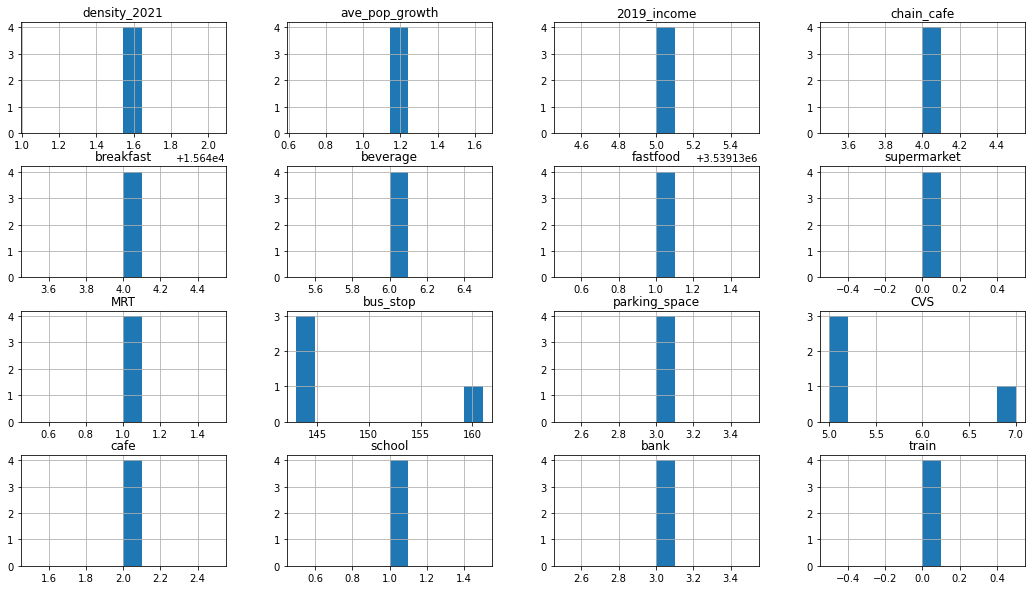

In [68]:
dfz_2.hist(figsize=(18, 10));

# 大部分人口密度(15641.54)
# 人口大多緩步負成長(1.141744)
# 年收均值(3539135)
# 平均有(4)間小型咖啡廳
# 早餐店(4)
# 飲料店(6)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(3)
# CVS(5)
# cafe(2)
# school(1)
# 銀行(3)
# 火車站(0)
# 巴士站至少(143)站

In [69]:
dfz_3=feature_o[feature_o['labels'] == 3].loc[:,'density_2021':'train']
dfz_3.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000e+00,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.000000,3.0,3.0,3.000000,3.0
mean,39070.837657,2.423895e-01,3108012.0,4.0,0.0,1.0,1.0,0.333333,0.0,65.333333,1.0,6.666667,1.0,0.0,4.666667,1.0
std,0.000000,3.399350e-17,0.0,0.0,0.0,0.0,0.0,0.577350,0.0,1.154701,0.0,0.577350,0.0,0.0,0.577350,0.0
min,39070.837657,2.423895e-01,3108012.0,4.0,0.0,1.0,1.0,0.000000,0.0,64.000000,1.0,6.000000,1.0,0.0,4.000000,1.0
25%,39070.837657,2.423895e-01,3108012.0,4.0,0.0,1.0,1.0,0.000000,0.0,65.000000,1.0,6.500000,1.0,0.0,4.500000,1.0
50%,39070.837657,2.423895e-01,3108012.0,4.0,0.0,1.0,1.0,0.000000,0.0,66.000000,1.0,7.000000,1.0,0.0,5.000000,1.0
75%,39070.837657,2.423895e-01,3108012.0,4.0,0.0,1.0,1.0,0.500000,0.0,66.000000,1.0,7.000000,1.0,0.0,5.000000,1.0
max,39070.837657,2.423895e-01,3108012.0,4.0,0.0,1.0,1.0,1.000000,0.0,66.000000,1.0,7.000000,1.0,0.0,5.000000,1.0


In [70]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
72,cama,新北市汐止區新台五路一段99號B1,25.061620,121.648248,39070.837657,0.24239,3108012,4,0.0,1.0,...,0.0,66.0,1.0,7.0,1.0,0.0,5.0,1.0,新北市汐止,3
331,louisa,新北市汐止區新北市汐止區新台五路一段75號B1,25.061182,121.645750,39070.837657,0.24239,3108012,4,0.0,1.0,...,0.0,64.0,1.0,6.0,1.0,0.0,4.0,1.0,新北市汐止,3
559,stbks,新北市汐止區新台五路一段99號,25.061620,121.648248,39070.837657,0.24239,3108012,4,0.0,1.0,...,0.0,66.0,1.0,7.0,1.0,0.0,5.0,1.0,新北市汐止,3


In [71]:
dfz_3.median()

density_2021      3.907084e+04
ave_pop_growth    2.423895e-01
2019_income       3.108012e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          6.600000e+01
parking_space     1.000000e+00
CVS               7.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              5.000000e+00
train             1.000000e+00
dtype: float64

In [ ]:
dfz_3.hist(figsize=(18, 10));

# 大部分人口密度(2156.336462)
# 人口大多緩步負成長(-2.364998)
# 年收均值(992878)
# 平均有(7)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(2)
# 超市(0)
# 捷運(1)
# 停車場(0)
# CVS(5)
# cafe(2)
# school(0)
# 銀行(2)
# 火車站(1)
# 巴士站至少(23)站

In [ ]:
dfz_4=feature_o[feature_o['labels'] == 4].loc[:,'density_2021':'train']
dfz_4.describe()

In [ ]:
feature_o[feature_o['labels'] == 4]

In [ ]:
dfz_4.median()

In [ ]:
dfz_4.hist(figsize=(18, 10));

# 大部分人口密度(37131.21)
# 人口大多緩步負成長(-1.493150)
# 年收均值(3643217)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(6)
# 飲料店(4)
# 速食餐廳(1)
# 超市(2)
# 捷運(2)
# 停車場(0)
# CVS(1)
# cafe(8)
# school(0)
# 銀行(7)
# 火車站(0)
# 巴士站至少(4)站

In [ ]:
dfz_5=feature_o[feature_o['labels'] == 5].loc[:,'density_2021':'train']
dfz_5.describe()

In [ ]:
feature_o[feature_o['labels'] == 5]

In [ ]:
dfz_5.median()

In [ ]:
dfz_5.hist(figsize=(18, 10));

# 大部分人口密度(27650.06)
# 人口大多緩步負成長(-0.3575181)
# 年收均值(2393420)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(3)
# 飲料店(4)
# 速食餐廳(2)
# 超市(0)
# 捷運(1)
# 停車場(2)
# CVS(14)
# cafe(6)
# school(0)
# 銀行(5)
# 火車站(1)
# 巴士站至少(10)站

In [ ]:
dfz_6=feature_o[feature_o['labels'] == 6].loc[:,'density_2021':'train']
dfz_6.describe()

In [ ]:
feature_o[feature_o['labels'] == 6]

In [ ]:
dfz_6.median()

In [ ]:
dfz_6.hist(figsize=(18, 10));

# 大部分人口密度(15641.54)
# 人口大多緩步負成長(1.141744)
# 年收均值(3539135)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(4)
# 飲料店(4)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(3)
# CVS(2)
# cafe(1)
# school(1)
# 銀行(1)
# 火車站(0)
# 巴士站至少(131)站

In [ ]:
dfz_7=feature_o[feature_o['labels'] == 7].loc[:,'density_2021':'train']
dfz_7.describe()

In [ ]:
feature_o[feature_o['labels'] == 7]

In [ ]:
dfz_7.median()

In [ ]:
dfz_7.hist(figsize=(18, 10));

# 大部分人口密度(39070.84)
# 人口大多緩步負成長(0.2423895)
# 年收均值(3108012)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(6)
# cafe(1)
# school(0)
# 銀行(4)
# 火車站(1)
# 巴士站至少(51.5)站

In [ ]:
dfz_8=feature_o[feature_o['labels'] == 8].loc[:,'density_2021':'train']
dfz_8.describe()

In [ ]:
feature_o[feature_o['labels'] == 8]

In [ ]:
dfz_8.median()

In [ ]:
dfz_8.hist(figsize=(18, 10));

# 大部分人口密度(5734.297)
# 人口大多緩步負成長(0.5857702)
# 年收均值(1631191)
# 平均有(10.5)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(6)
# 速食餐廳(11)
# 超市(0)
# 捷運(2)
# 停車場(1.5)
# CVS(27.5)
# cafe(5.5)
# school(0)
# 銀行(10)
# 火車站(1)
# 巴士站至少(50.5)站

In [ ]:
dfz_9=feature_o[feature_o['labels'] == 9].loc[:,'density_2021':'train']
dfz_9.describe()

In [ ]:
feature_o[feature_o['labels'] == 9]

In [ ]:
dfz_9.median()

In [ ]:
dfz_9.hist(figsize=(18, 10));

# 大部分人口密度(29466.57)
# 人口大多緩步負成長(-1.142284)
# 年收均值(5786935)
# 平均有(0)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(4)
# 速食餐廳(0)
# 超市(0)
# 捷運(1)
# 停車場(2)
# CVS(13)
# cafe(10)
# school(0)
# 銀行(22)
# 火車站(0)
# 巴士站至少(14)站

In [ ]:
dfz_10=feature_o[feature_o['labels'] == 10].loc[:,'density_2021':'train']
dfz_10.describe()

In [ ]:
feature_o[feature_o['labels'] == 10]

In [ ]:
dfz_10.median()

In [ ]:
dfz_10.hist(figsize=(18, 10));

# 大部分人口密度(18733.977285)
# 人口大多緩步負成長(2.921902)
# 年收均值(803548)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(3)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(5)
# CVS(5.5)
# cafe(0)
# school(1)
# 銀行(1)
# 火車站(0)
# 巴士站至少(103)站